In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset

In [3]:
df= pd.read_csv("kdd_train.csv")

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
df.shape

(125973, 42)

In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# missing values
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## Separate input and output values

In [8]:
x= list(df.columns)[1:-1]
y= list(df.labels)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()[:-1]

In [9]:
x

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [10]:
y

['normal',
 'normal',
 'neptune',
 'normal',
 'normal',
 'neptune',
 'neptune',
 'neptune',
 'neptune',
 'neptune',
 'neptune',
 'neptune',
 'normal',
 'warezclient',
 'neptune',
 'neptune',
 'normal',
 'ipsweep',
 'normal',
 'normal',
 'neptune',
 'neptune',
 'normal',
 'normal',
 'neptune',
 'normal',
 'neptune',
 'normal',
 'normal',
 'normal',
 'ipsweep',
 'neptune',
 'normal',
 'portsweep',
 'normal',
 'normal',
 'normal',
 'neptune',
 'normal',
 'neptune',
 'neptune',
 'neptune',
 'normal',
 'normal',
 'normal',
 'neptune',
 'teardrop',
 'normal',
 'warezclient',
 'neptune',
 'normal',
 'neptune',
 'teardrop',
 'normal',
 'normal',
 'normal',
 'nmap',
 'neptune',
 'neptune',
 'normal',
 'normal',
 'neptune',
 'satan',
 'normal',
 'neptune',
 'normal',
 'portsweep',
 'neptune',
 'neptune',
 'neptune',
 'normal',
 'neptune',
 'normal',
 'normal',
 'neptune',
 'normal',
 'neptune',
 'normal',
 'normal',
 'neptune',
 'normal',
 'neptune',
 'neptune',
 'ipsweep',
 'normal',
 'neptune'

In [11]:
numeric_cols

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate']

## Data preprocessing

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

target = df['labels']
df['labels'] = le.fit_transform(target)
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])

In [14]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0.000000,1,20,9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,11
1,0.000000,2,44,9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,11
2,0.000000,1,49,5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9
3,0.000000,1,24,9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,11
4,0.000000,1,24,9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,1,49,5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,9
125969,0.000186,2,49,9,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,...,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,11
125970,0.000000,1,54,9,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,...,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,11
125971,0.000000,1,30,5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,9


<AxesSubplot:>

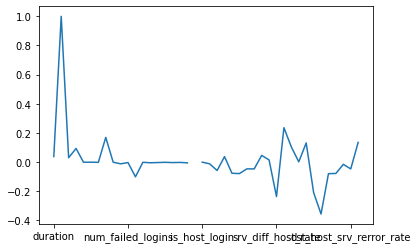

In [15]:
df.corr()['protocol_type'].plot()

<AxesSubplot:>

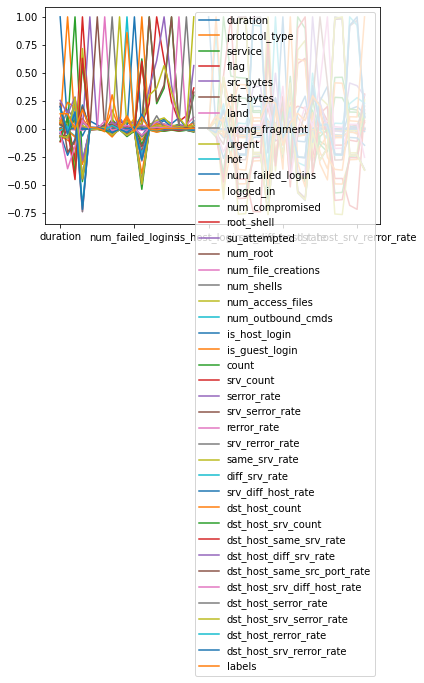

In [16]:
df.corr().plot()

In [14]:
X= df.drop(columns="labels")
Y= df.labels

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,random_state=0)

## Random forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf= RandomForestClassifier(n_estimators=1000)

In [18]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [43]:
rf.score(x_test, y_test)

0.9971423128214898

In [28]:
rf.predict(x_test)

array([11, 11, 11, ..., 11,  9,  9])

## SVM

In [20]:
from sklearn.svm import SVC

In [22]:
svc= SVC(kernel='linear')

In [23]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [29]:
svc.score(x_test, y_test)

0.983711183082492

In [30]:
svc.predict(x_test)

array([11, 11, 11, ..., 11,  9,  9])

## XGBoost

In [31]:
from xgboost import XGBClassifier

In [32]:
xg_model= XGBClassifier()

In [33]:
xg_model.fit(x_train, y_train)

C:\Users\PRASOON\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
xg_model.score(x_test, y_test)

0.9988251730488347

In [35]:
xg_model.predict(x_test)

array([11, 11, 11, ..., 11,  9,  9])